In [1]:
import dicom2nifti
import nibabel as nb
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [ ]:
#betelgeuse
sys.path.append('/home/john/code/PSIRprocSiemens/')
import PSIRprocSiemens
mag_dir = '/home/john/cubric/data/7TMPRAGE/22_10_28-11_18_31-DST-1_3_12_2_1107_5_2_34_18984/scans/44-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_MAG/resources/DICOM/files'
phs_dir = '/home/john/cubric/data/7TMPRAGE/22_10_28-11_18_31-DST-1_3_12_2_1107_5_2_34_18984/scans/45-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_PHS/resources/DICOM/files'

In [2]:
#wl026
sys.path.append('/home/sapje1/code/PSIRprocSiemens/')
import PSIRprocSiemens
mag_dir = '/home/sapje1/scratch_sapje1/projects/476_bbbcov/temp_psir_test/22_10_17-11_23_37-DST-1_3_12_2_1107_5_2_34_18984/scans/43-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_MAG/resources/DICOM/files'
phs_dir = '/home/sapje1/scratch_sapje1/projects/476_bbbcov/temp_psir_test/22_10_17-11_23_37-DST-1_3_12_2_1107_5_2_34_18984/scans/44-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_PHS/resources/DICOM/files'

In [ ]:
#  use icometrix dicom2nifti to convert dicom to nifti

In [3]:
os.chdir(mag_dir)

In [4]:
mag_fname = os.path.join(mag_dir, 'mag.nii.gz')
phs_fname = os.path.join(phs_dir, 'phs.nii.gz')
out_m = dicom2nifti.dicom_series_to_nifti(mag_dir, mag_fname, reorient_nifti=True)
out_p = dicom2nifti.dicom_series_to_nifti(phs_dir, phs_fname,  reorient_nifti=True)

In [5]:
# out contains dict with file info
mag_img = nb.load(out_m['NII_FILE'])

In [6]:
type(mag_img)

nibabel.nifti1.Nifti1Image

In [7]:
print(mag_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (224, 320, 320, 2)
affine: 
[[  -0.69999999    0.            0.           78.05000305]
 [   0.            0.69999999    0.          -70.67349243]
 [  -0.           -0.            0.69999999 -129.11204529]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4 224 320 320   2   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   0.7  0.7  0.7  1.   1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset

In [8]:
mag_img_data = mag_img.get_fdata()

In [9]:
mag_img_data.shape

(224, 320, 320, 2)

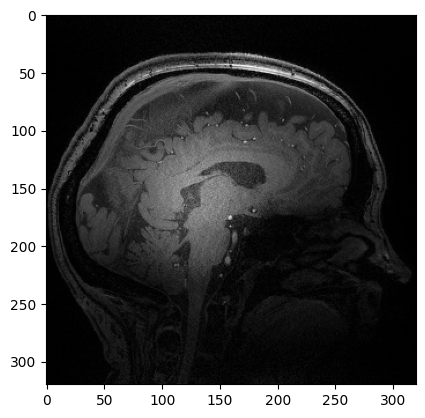

In [10]:
plt.imshow(np.flipud(mag_img_data[110,:,:,1].T), cmap='Greys_r')

<IPython.core.display.Javascript object>


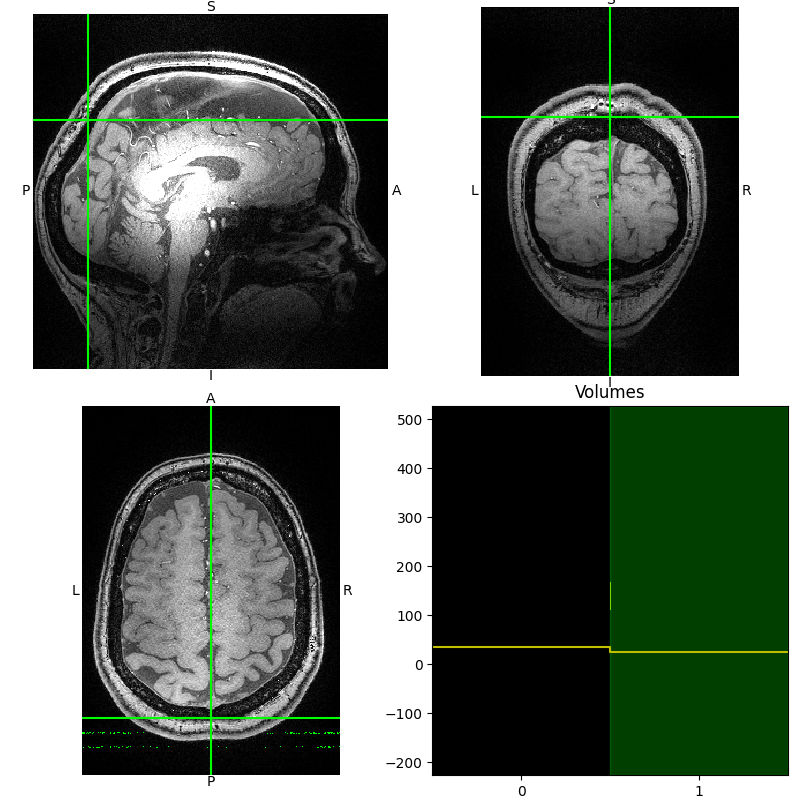

<OrthoSlicer3D: /home/sapje1/scratch_sapje1/projects/476_bbbcov/temp_psir_test/22_10_17-11_23_37-DST-1_3_12_2_1107_5_2_34_18984/scans/43-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_MAG/resources/DICOM/files/mag.nii.gz (224, 320, 320, 2)>

In [11]:
%matplotlib notebook
mag_img.orthoview()

In [ ]:
#  attempt to do the PSIR recon of the MP2RAGE here too
# not enough memory on betelgeuse

In [13]:
# on wl026
PSIRprocSiemens.PSIRprocSiemens(mag_fname, phs_fname, '/home/sapje1/psir')

Noise correction done with beta of 92.0 for PSIR as well as 1512.1000000000001 for MP2RAGE.
